In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

#### IMPORTING DATA AND ITS PRIMARY DESCRIPTIVE CLASSIFICATION

In [53]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [55]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [56]:
df['label'].nunique()

22

In [57]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [58]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [59]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### CHECKING NULL VALUES

In [60]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

In [61]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#### DATA VISUALIZATION

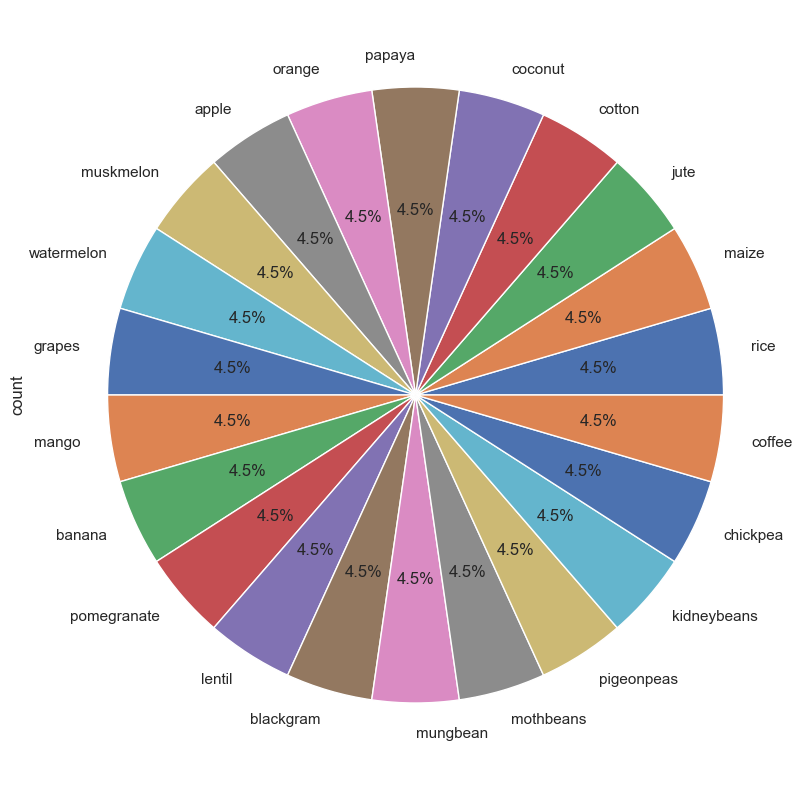

In [62]:
plt.figure(figsize=(10,10))
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11284\27405602.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label',y='temperature',data=df,color='Red',ci=None)


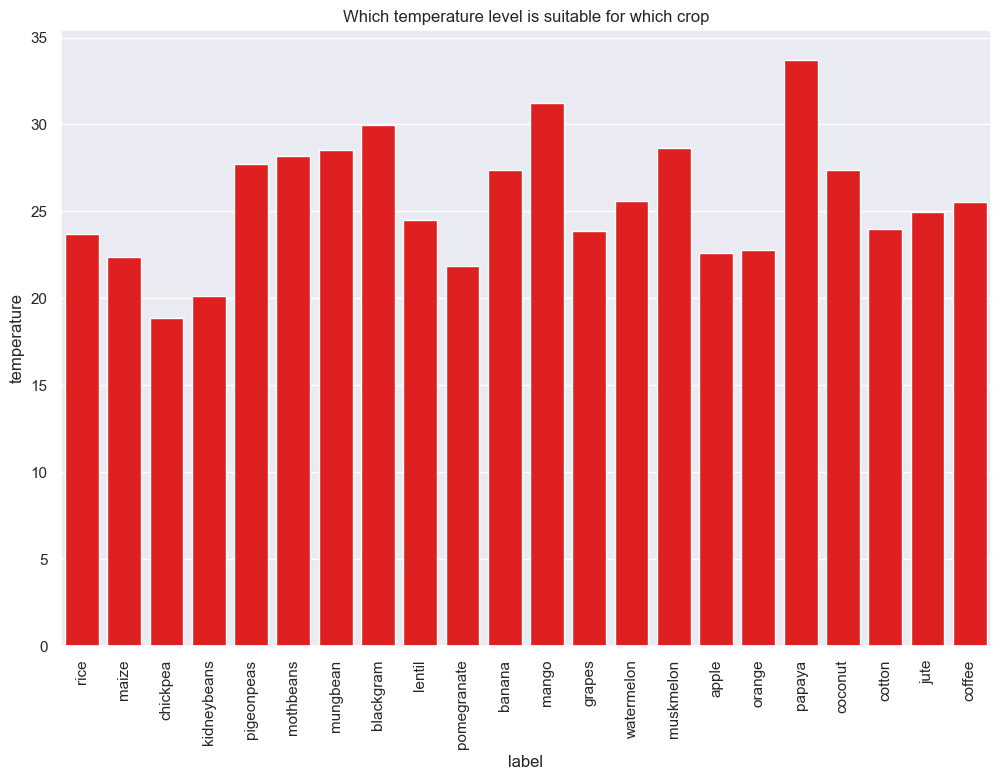

In [63]:
sns.barplot(x='label',y='temperature',data=df,color='Red',ci=None)
plt.xticks(rotation=90)
plt.title("Which temperature level is suitable for which crop")
plt.show()

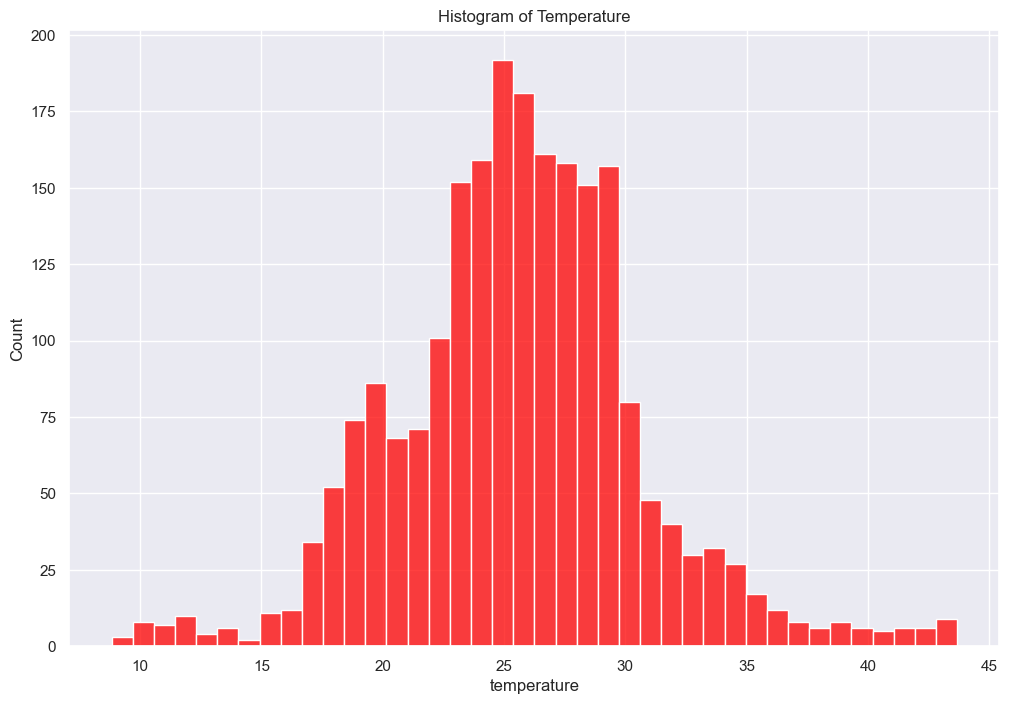

In [64]:
sns.histplot(df['temperature'],color='Red')
plt.title('Histogram of Temperature')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11284\821523954.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label',y='rainfall',data=df,color='Green',ci=None)


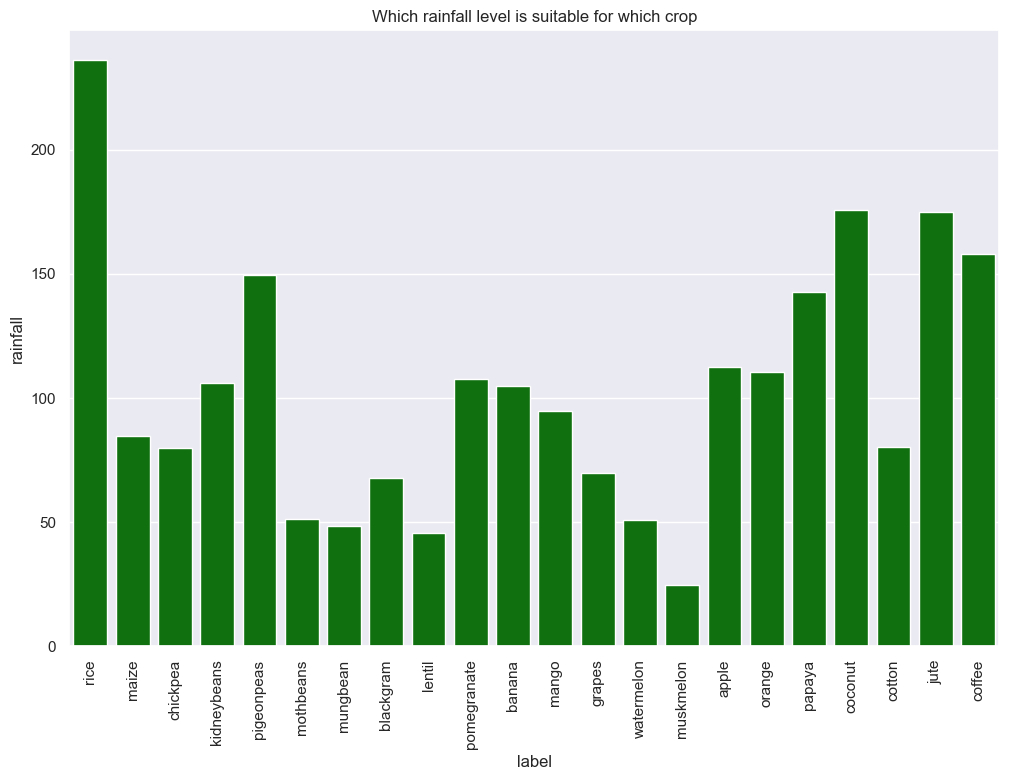

In [65]:
sns.barplot(x='label',y='rainfall',data=df,color='Green',ci=None)
plt.xticks(rotation=90)
plt.title("Which rainfall level is suitable for which crop")
plt.show()

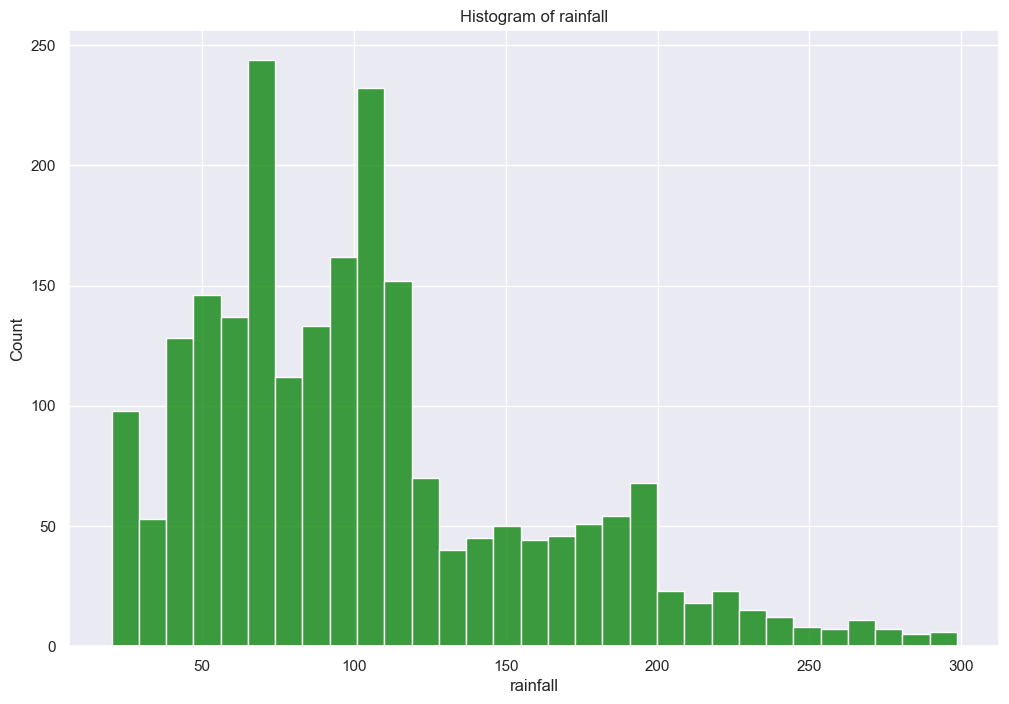

In [66]:
sns.histplot(df['rainfall'],color='Green')
plt.title('Histogram of rainfall')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11284\1463871696.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label',y='humidity',data=df,color='Blue',ci=None)


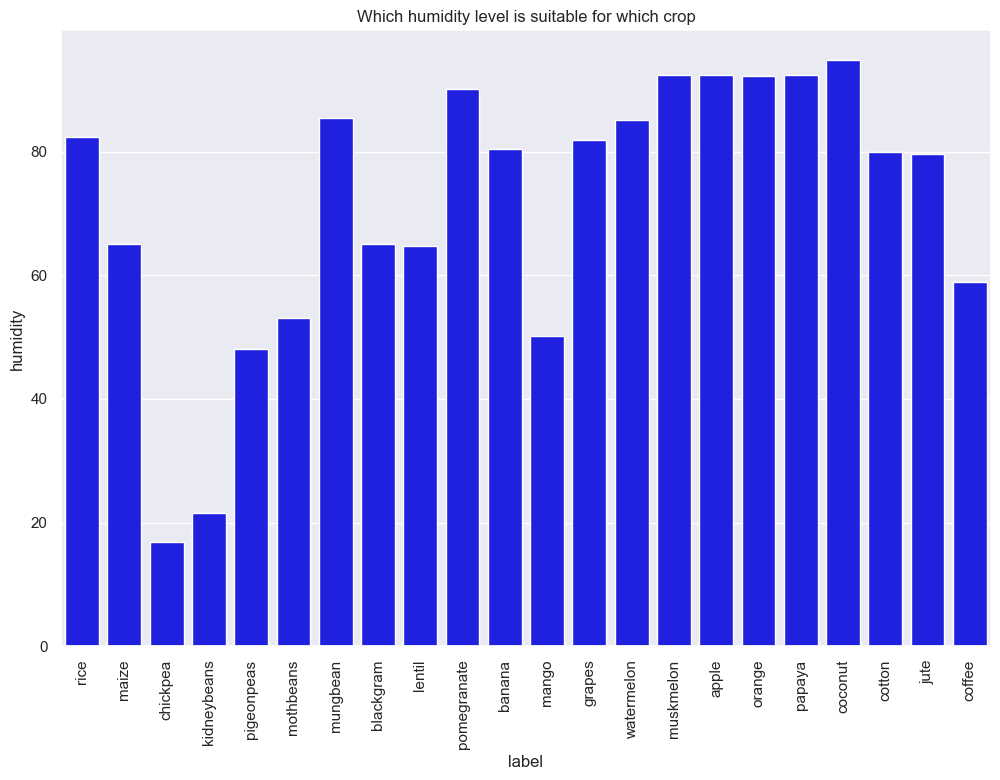

In [67]:
sns.barplot(x='label',y='humidity',data=df,color='Blue',ci=None)
plt.xticks(rotation=90)
plt.title("Which humidity level is suitable for which crop")
plt.show()

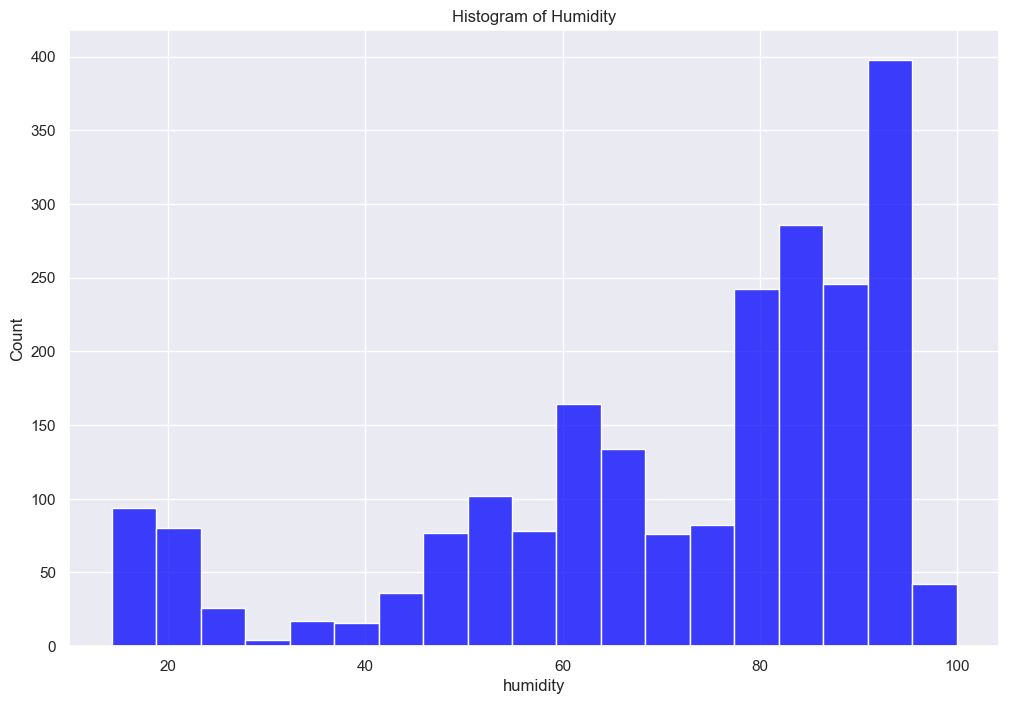

In [68]:
sns.histplot(df['humidity'],color='Blue')
plt.title('Histogram of Humidity')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11284\2396287441.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label',y='ph',data=df,color='Orange',ci=None)


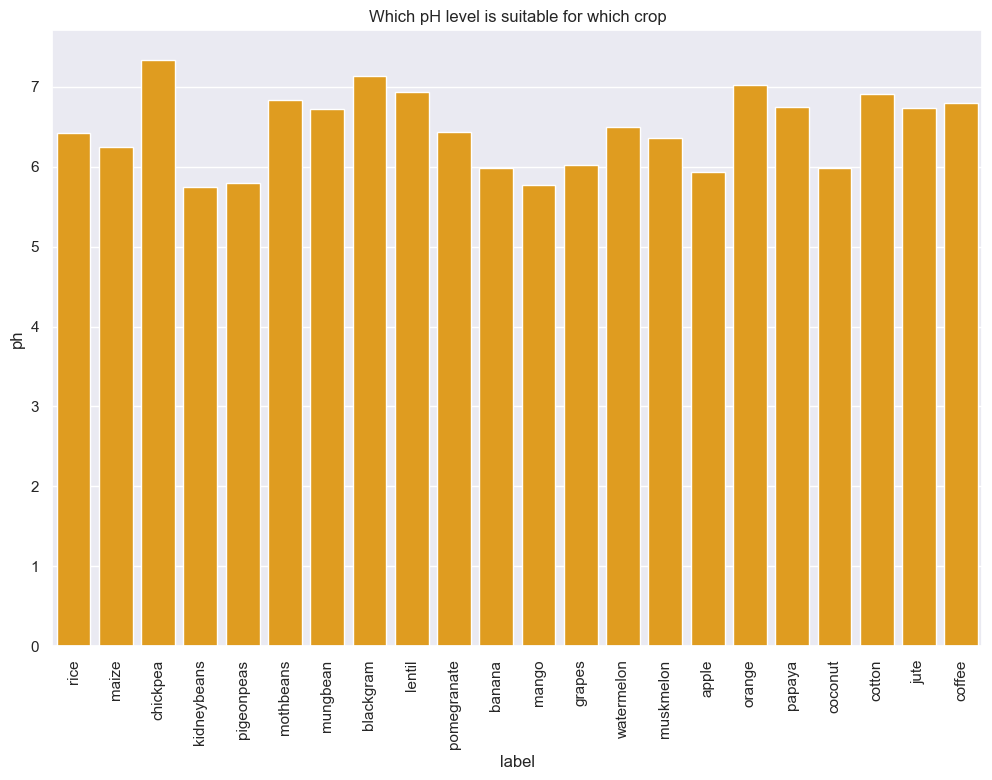

In [69]:
sns.barplot(x='label',y='ph',data=df,color='Orange',ci=None)
plt.xticks(rotation=90)
plt.title("Which pH level is suitable for which crop")
plt.show()

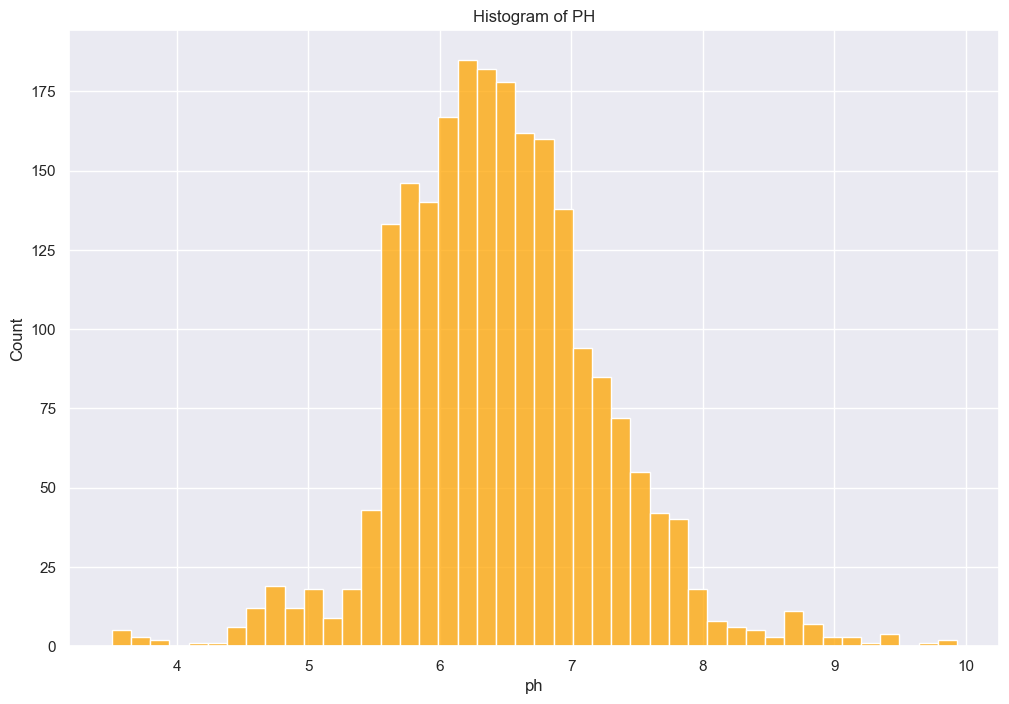

In [70]:
sns.histplot(df['ph'],color='Orange')
plt.title('Histogram of PH')
plt.show()

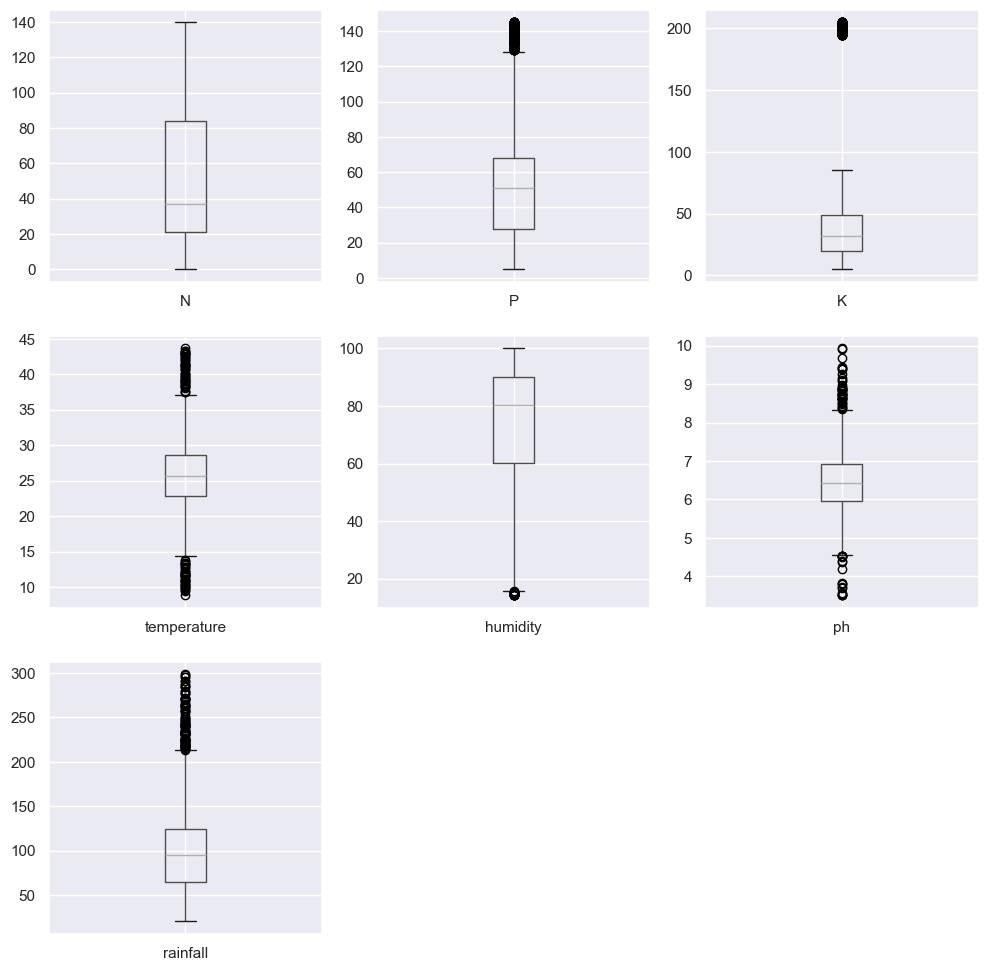

In [71]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:-1]:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

#### OUTLIER REMOVAL OF RAINFALL

<Axes: ylabel='rainfall'>

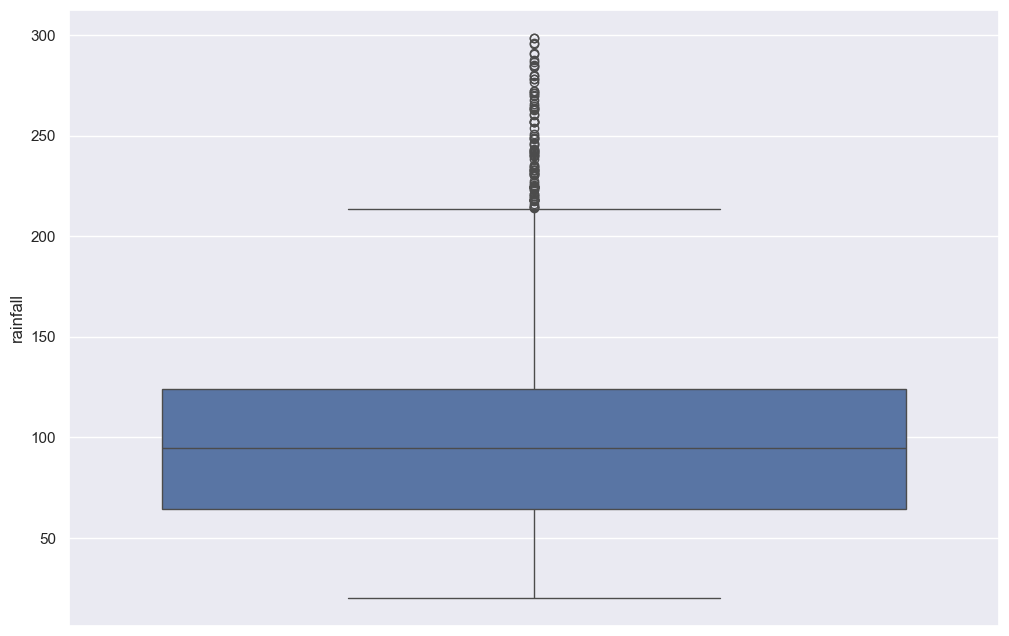

In [72]:
sns.boxplot(df['rainfall'])

In [73]:
q1 = df['rainfall'].quantile(0.25)
q3 = df['rainfall'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

213.84124050000003
-25.022046700000033


<Axes: ylabel='rainfall'>

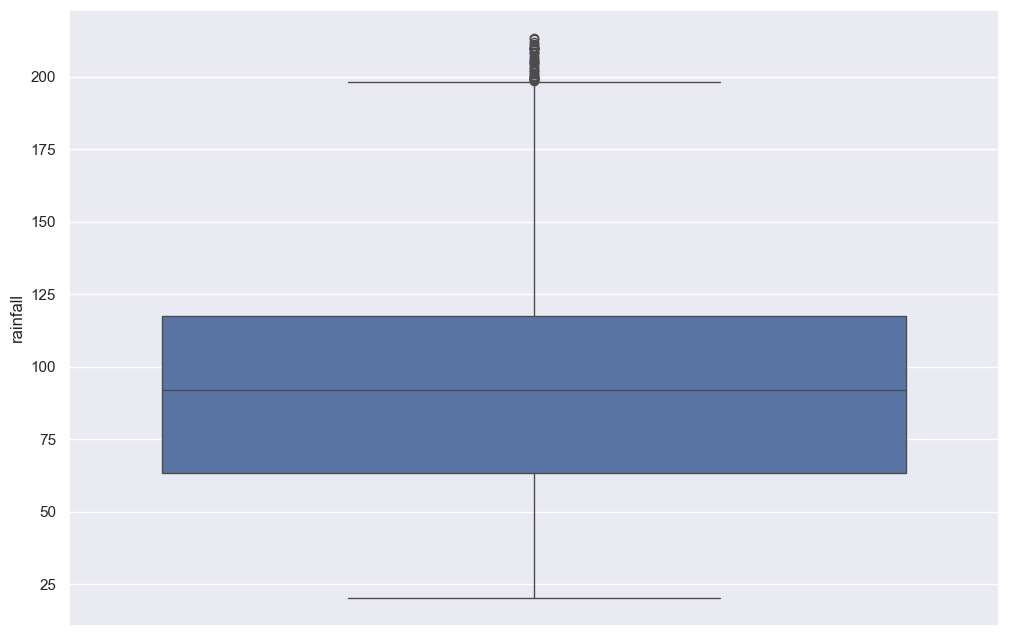

In [74]:
df = df[df['rainfall']<upper_limit]
sns.boxplot(df['rainfall'])

#### UPDATED BOXPLOT AFTER OUTLIER REMOVAL

<Axes: >

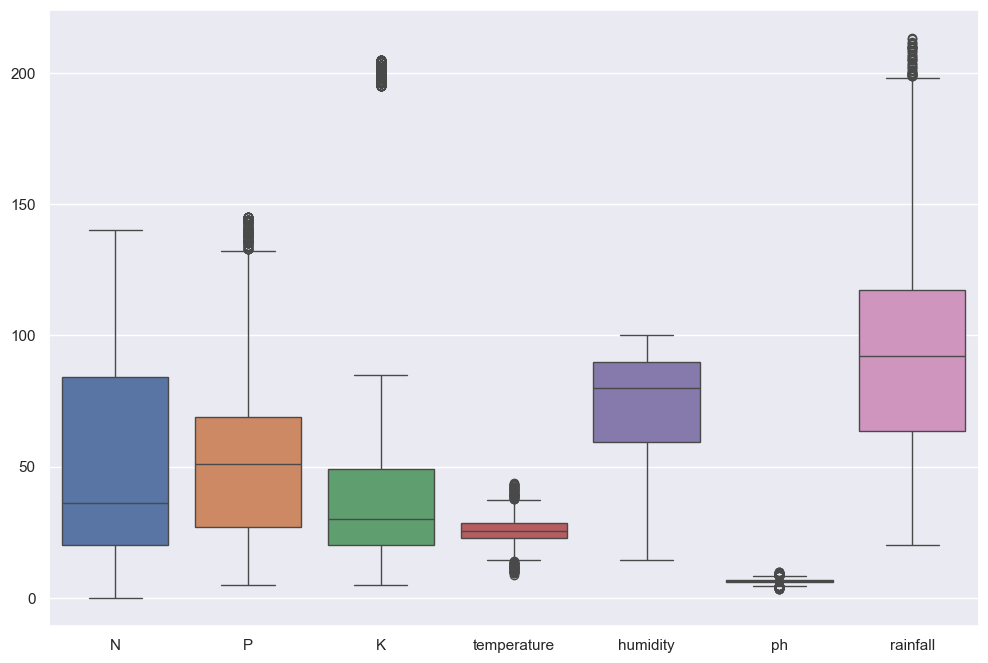

In [75]:
sns.set(rc={"figure.figsize":(12,8)})
sns.boxplot(df)

#### SKEWNESS MEASUREMENT

In [76]:
df.iloc[:,:-1].skew()

N              0.556083
P              0.983393
K              2.305495
temperature    0.113314
humidity      -1.032366
ph             0.289562
rainfall       0.619648
dtype: float64

#### LABEL ENCODING

In [77]:
class_labels = df['label'].unique().tolist()
print(class_labels)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
print(df['label'])

['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
0       20
13      20
14      20
17      20
20      20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2100, dtype: int32


C:\Users\USER\AppData\Local\Temp\ipykernel_11284\535666962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = le.fit_transform(df['label'])


In [78]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
13,93,56,36,24.014976,82.056872,6.984354,185.277339,20
14,94,50,37,25.665852,80.663850,6.948020,209.586971,20
17,91,35,39,23.793920,80.418180,6.970860,206.261186,20
20,89,45,36,21.325042,80.474764,6.442475,185.497473,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


#### CORRELATION CALCULATION

In [79]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.237892,-0.140176,0.042007,0.190382,0.098636,0.004600,-0.076670
P,-0.237892,1.000000,0.737891,-0.133106,-0.111138,-0.146806,-0.045343,-0.518724
K,-0.140176,0.737891,1.000000,-0.165114,0.198366,-0.174805,-0.042169,-0.357334
temperature,0.042007,-0.133106,-0.165114,1.000000,0.203497,-0.020953,-0.040443,0.129956
humidity,0.190382,-0.111138,0.198366,0.203497,1.000000,-0.005238,0.019415,0.179840
ph,0.098636,-0.146806,-0.174805,-0.020953,-0.005238,1.000000,-0.125894,-0.017939
rainfall,0.004600,-0.045343,-0.042169,-0.040443,0.019415,-0.125894,1.000000,-0.117595
label,-0.076670,-0.518724,-0.357334,0.129956,0.179840,-0.017939,-0.117595,1.000000


<Axes: >

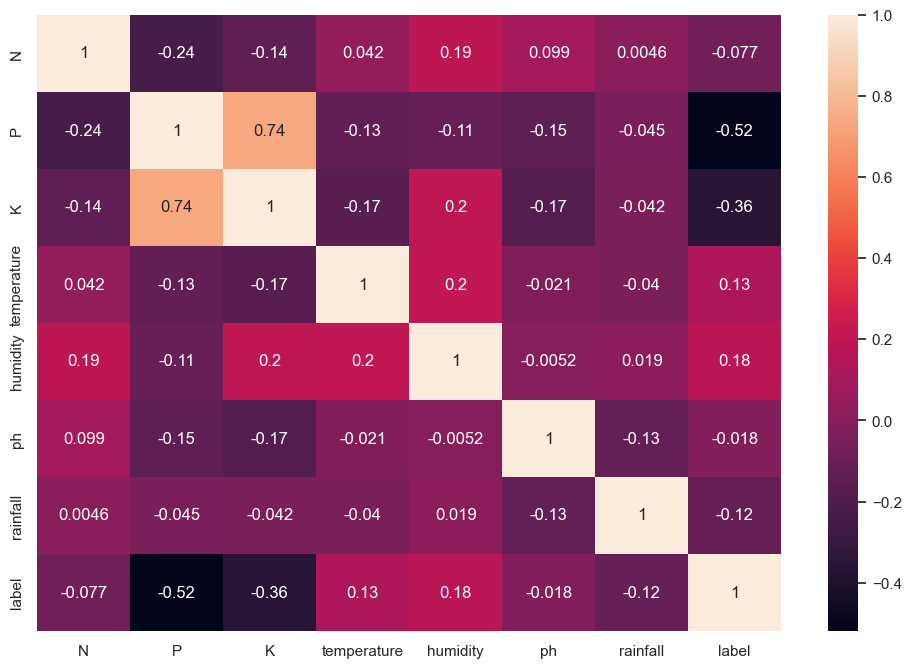

In [80]:
sns.heatmap(df.corr(),annot=True)

#### SEPARATION OF DEPENDENT AND INDEPENDENT VARIABLES

In [81]:
x = df.drop('label',axis=1)
y = df['label']

In [82]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
13,93,56,36,24.014976,82.056872,6.984354,185.277339
14,94,50,37,25.665852,80.663850,6.948020,209.586971
17,91,35,39,23.793920,80.418180,6.970860,206.261186
20,89,45,36,21.325042,80.474764,6.442475,185.497473
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [83]:
y

0       20
13      20
14      20
17      20
20      20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2100, dtype: int32

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=True)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1890, 7) (210, 7) (1890,) (210,)


In [85]:
acc=[]
model=[]

##### LOGISTIC REGRESSION

In [86]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
y_pred = lr_model.predict(x_test)
y_pred

array([ 0, 16, 12,  0,  1, 14, 21, 20,  4, 14, 13, 12,  6,  7,  3,  6,  5,
        9,  9,  4, 12, 18, 19, 17, 21, 17, 21,  5, 21,  4,  0, 14, 12,  3,
       18, 19,  2,  0, 14, 18, 13,  4,  3, 17,  1,  0, 14, 20,  2, 21, 16,
       14, 13,  1, 13, 11, 12,  8,  9, 16,  9, 16, 18, 19, 12,  3,  8,  5,
       17, 19,  0,  0,  2,  8, 10,  0,  6,  5,  5,  2,  8, 11, 21, 15, 11,
        1, 14,  9, 10, 17,  8,  1,  1,  3, 21,  8,  8, 21,  4, 18, 15, 13,
        0, 20, 12, 21, 10, 15, 17, 18,  1, 14, 17,  7,  0, 19, 21, 10, 14,
       18, 11, 18, 10, 10, 21, 12, 21, 17, 13, 21, 18,  6,  3, 16,  5,  1,
        6, 13, 13,  9,  6, 21, 19, 13,  9, 21,  7,  0, 12,  7,  6, 21,  0,
       13,  6,  6, 16, 18, 18,  6,  0,  1,  0, 11, 12, 16, 11, 13,  8,  5,
        8, 13,  7, 12, 11,  8, 18, 10,  3, 11, 11, 14,  3, 12,  6, 14, 15,
        8, 21, 16,  3, 14, 13,  5,  4, 12, 20,  3,  6, 14,  5, 17,  4,  6,
       10, 12, 19, 20, 14,  9])

In [88]:
y_test

1535     0
1605    16
1178    12
1581     0
1044     1
        ..
1172    12
929     19
2065     8
697     14
370      9
Name: label, Length: 210, dtype: int32

In [89]:
x=accuracy_score(y_test,y_pred)
print(x)
acc.append(x)
model.append('Logistic Regression')

0.9476190476190476


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      0.57      0.73         7
           3       1.00      1.00      1.00        10
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00         9
           6       0.92      0.92      0.92        13
           7       1.00      1.00      1.00         5
           8       0.82      0.82      0.82        11
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       0.89      0.89      0.89         9
          12       1.00      1.00      1.00        14
          13       0.77      0.91      0.83        11
          14       0.93      1.00      0.96        13
          15       1.00      1.00      1.00         4
          16       0.88      1.00      0.93         7
          17       1.00    

##### DECISION TREE CLASSIFIER

In [91]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
y_pred = dt_model.predict(x_test)
y_pred

array([ 0, 16, 12,  0,  1, 14, 21, 20,  4, 14,  2, 12,  6,  7,  3,  6,  5,
        9,  9,  4, 12, 18, 19, 17, 21, 17, 21,  5, 21,  4,  0, 14, 12,  3,
       18, 19,  2,  0, 14, 18, 13,  4,  3, 17,  1,  0, 14,  8,  2, 21, 16,
       14, 13,  1, 13, 11, 12,  8,  9, 16,  9, 16, 18, 19, 12,  3,  8,  5,
       17, 19,  0,  0,  2,  8, 10,  0,  6,  5,  5,  2,  8, 11, 21, 15, 11,
        1, 14,  9, 10, 17, 20,  1,  1,  3, 21,  8, 20, 21,  4, 18, 15, 13,
        0,  8, 12, 21, 10, 15, 17, 18,  1, 14, 17,  7,  0, 19, 21, 10, 14,
       18, 11, 18, 10, 10, 21, 12, 21, 17, 13, 21, 18,  6,  3,  4,  5,  1,
        6, 13, 13,  9,  6, 21, 19,  2,  9, 21,  7,  0, 12,  7,  6, 21,  0,
       13,  6, 11, 16, 18, 18,  6,  0,  1,  0, 11, 12, 16,  6, 13,  8,  5,
        8, 13,  7, 12, 11,  8, 18, 10,  3, 11, 11, 14,  3, 12,  6, 14, 15,
        8, 21, 16,  3, 14, 13,  5,  4, 12, 20,  3,  6, 13,  5, 17,  4,  6,
       10, 12, 19,  8, 14,  9])

In [93]:
y_test

1535     0
1605    16
1178    12
1581     0
1044     1
        ..
1172    12
929     19
2065     8
697     14
370      9
Name: label, Length: 210, dtype: int32

In [94]:
x=accuracy_score(y_test,y_pred)
print(x)
acc.append(x)
model.append('Decision Tree Classifier')

0.9809523809523809


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         5
           8       0.83      0.91      0.87        11
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        14
          13       0.92      1.00      0.96        11
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         7
          17       1.00    

##### RANDOM FOREST CLASSIFIER

In [96]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
y_pred = rf_model.predict(x_test)
y_pred

array([ 0, 16, 12,  0,  1, 14, 21, 20,  4, 14,  2, 12,  6,  7,  3,  6,  5,
        9,  9,  4, 12, 18, 19, 17, 21, 17, 21,  5, 21,  4,  0, 14, 12,  3,
       18, 19,  2,  0, 14, 18, 13,  4,  3, 17,  1,  0, 14,  8,  2, 21, 16,
       14, 13,  1, 13, 11, 12,  8,  9, 16,  9, 16, 18, 19, 12,  3,  8,  5,
       17, 19,  0,  0,  2, 20, 10,  0,  6,  5,  5,  2,  8, 11, 21, 15, 11,
        1, 14,  9, 10, 17, 20,  1,  1,  3, 21,  8,  8, 21,  4, 18, 15, 13,
        0,  8, 12, 21, 10, 15, 17, 18,  1, 14, 17,  7,  0, 19, 21, 10, 14,
       18, 11, 18, 10, 10, 21, 12, 21, 17, 13, 21, 18,  6,  3,  4,  5,  1,
        6,  2, 13,  9,  6, 21, 19,  2,  9, 21,  7,  0, 12,  7,  6, 21,  0,
       13,  6, 11, 16, 18, 18,  6,  0,  1,  0, 11, 12, 16,  6, 13,  8,  5,
        8, 13,  7, 12, 11,  8, 18, 10,  3, 11, 11, 14,  3, 12,  6, 14, 15,
        8, 21, 16,  3, 14, 13,  5,  4, 12, 20,  3,  6, 13,  5, 17,  4,  6,
       10, 12, 19,  8, 14,  9])

In [98]:
y_test

1535     0
1605    16
1178    12
1581     0
1044     1
        ..
1172    12
929     19
2065     8
697     14
370      9
Name: label, Length: 210, dtype: int32

In [99]:
x=accuracy_score(y_test,y_pred)
print(x)
acc.append(x)
model.append('Random Forest Classifier')

0.9952380952380953


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         5
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         7
          17       1.00    

C:\Users\USER\AppData\Local\Temp\ipykernel_11284\2464031616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

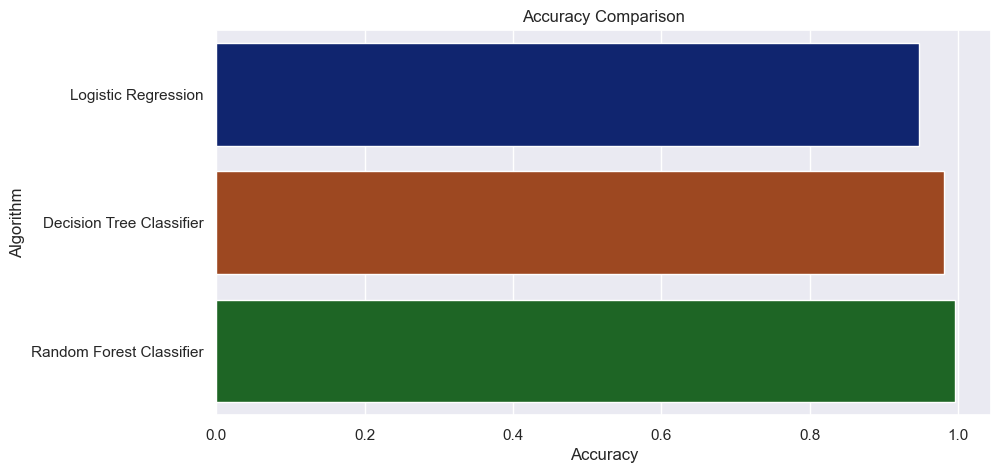

In [101]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [102]:
values = input("Enter the values for nitrogen content, phosphorus content, potassium content, temperature, humidity, ph and rainfall as comma seperated values: ")
values = np.array([float(x) for x in values.split(',')])
data = values.reshape(1, -1)
prediction = lr_model.predict(data)
print(prediction)

[20]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [103]:
le.inverse_transform([prediction])

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['rice'], dtype=object)

In [104]:
import pickle

model = lr_model

pkl_file_path = 'model.pkl'

with open(pkl_file_path, 'wb') as file:
    pickle.dump(model, file)

In [105]:
check_labels = df['label'].unique().tolist()
map_encode = {x:le.inverse_transform([x])[0] for x in check_labels}
print(map_encode)

{20: 'rice', 11: 'maize', 3: 'chickpea', 9: 'kidneybeans', 18: 'pigeonpeas', 13: 'mothbeans', 14: 'mungbean', 2: 'blackgram', 10: 'lentil', 19: 'pomegranate', 1: 'banana', 12: 'mango', 7: 'grapes', 21: 'watermelon', 15: 'muskmelon', 0: 'apple', 16: 'orange', 17: 'papaya', 4: 'coconut', 6: 'cotton', 8: 'jute', 5: 'coffee'}
